In [1]:
import numpy as np
import gym
import gym_crumb
from math import radians


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [3]:
env = gym.make("crumb-v0")


WARN: Environment '<class 'gym_crumb.envs.crumb_env.CrumbEnv'>' has deprecated methods. Compatibility code invoked.


In [4]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.25,discount=0.99)

In [5]:
env.reset()

[1.0, 0.0, -2.0]

In [6]:
def play_and_train(env,agent,t_max=10**4):

    total_reward = 0.0
    s = env.reset()
    r = 0
    env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getAction(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        
        agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
    return total_reward
    
        
    

In [8]:
play_and_train(env, agent)

94.0

In [7]:
def play(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()
    r = 0
    env.step((3, radians(0)))
    for t in range(t_max):
        a = agent.getPolicy(tuple(s))#<get agent to pick action given state s>
        
        next_s,r, done = env.step(a)
        
        #agent.update(tuple(s), a, tuple(next_s), r)#<train (update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
    return total_reward

In [9]:
play(env, agent)

100.0

mean reward 107.0


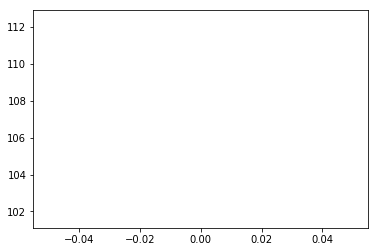

KeyboardInterrupt: 

In [8]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        print "mean reward",np.mean(rewards[-100:])
        plt.plot(rewards)
        plt.show()
        

In [11]:
from collections import defaultdict
a = defaultdict(lambda:defaultdict(lambda:0))

In [18]:
agent._qValues

defaultdict(<function qlearning.<lambda>>,
            {(-1.0,
              -2.0,
              -2.0,
              0.0,
              -1.0): defaultdict(<function qlearning.<lambda>>, {(1,
                           -1.5707963267948966): -0.5,
                          (1, 0.0): 1.1510097908933774,
                          (1, 1.5707963267948966): 0.05251875,
                          (2, -1.5707963267948966): -0.41817963242187495,
                          (2, 0.0): 0,
                          (2, 1.5707963267948966): 0}),
             (-1.0,
              -2.0,
              -2.0,
              0.0,
              0.0): defaultdict(<function qlearning.<lambda>>, {(1,
                           -1.5707963267948966): -0.35867442171874997,
                          (1, 0.0): 2.9785534532177094,
                          (1, 1.5707963267948966): -0.5,
                          (2, -1.5707963267948966): 0,
                          (2, 0.0): 0,
                          (2, 1.570796326